# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Introduction To Reinforcement Learning. Lessons 5-6</span>

##   &#x1F916; &nbsp; <span style="color:red">Links & Libraries</span>

http://incompleteideas.net/sutton/book/bookdraft2016aug.pdf

https://www.researchgate.net

Planning by Dynamic Programming: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/DP.pdf

Markov Decision Processes: http://isites.harvard.edu/fs/docs/icb.topic539621.files/lec3.pdf

OPTIMIZATION UNDER UNCERTAINTY: https://sites.math.washington.edu/~rtr/uncertainty.pdf

THE LINEAR PROGRAMMING APPROACH TO APPROXIMATE DYNAMIC PROGRAMMING: THEORY AND APPLICATION
http://web.mit.edu/~pucci/www/daniela_thesis.pdf  

Reinforcement learning and dynamic programming using function approximators
https://orbi.ulg.ac.be/bitstream/2268/27963/1/book-FA-RL-DP.pdf

Dynamic Programming: http://www.ime.unicamp.br/~andreani/MS515/capitulo7.pdf

Dynamic Programming: http://web.mit.edu/15.053/www/AMP-Chapter-11.pdf

A Comparison of Discrete and Parametric Approximation Methods for Continuous-State Dynamic Programming Problems:
http://aida.econ.yale.edu/~econ681/dpa.pdf

Dynamic Potential-Based Reward Shaping: http://eprints.whiterose.ac.uk/75121/1/aamas2012.pdf

A Comprehensive Survey of Multiagent Reinforcement Learning: http://www.dcsc.tudelft.nl/~rbabuska/bib/ieee-smc-busoniu.pdf

Potential Based Reward Shaping Tutorial: http://swarmlab.unimaas.nl/ala2014/tutorials/pbrs-tut.pdf

Learning from Demonstration for Shaping through Inverse Reinforcement Learning: http://ai.vub.ac.be/~tbrys/publications/Suay2016AAMAS.pdf

Q-Learning Overview & Code: http://burlap.cs.brown.edu/tutorials/cpl/p3.html

In [2]:
from IPython.core.display import Image

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 5.  Advanced Algorithmic Analysis</span>

In dynamic programming (DP) and reinforcement learning (RL), a controller (agent, decision maker) interacts with a process (environment), by means of three signals: a state signal, which describes the state of the process, an action signal, which allowsthe controller to influence the process, and a scalar reward signal, which provides the controller with feedback on its immediate performance. At each discrete time step, the controller receives the state measurement and applies an action, which causes the process to transition into a new state. A reward is generated that evaluates the quality of this transition. The controller receives the new state measurement, and the whole cycle repeats.

The behavior of the controller is dictated by its policy, a function from states into actions. The behavior of the process is described by its dynamics, which determine how the state changes as a result of the controller’s actions. State transitions can be deterministic or stochastic. In the deterministic case, taking a given action in a given state always results in the same next state, while in the stochastic case, the next state is a random variable. The rule according to which rewards are generated is described by the reward function. The process dynamics and the reward function, together with the set of possible states and the set of possible actions (respectively called state space and action space), constitute a so-called Markov decision process (MDP).

In the DP/RL setting, the goal is to find an optimal policy that maximizes the (expected) return, consisting of the (expected) cumulative reward over the course of interaction.

**Dynamic Programming (DP)** is a very general solution method for problems which have two properties:
    
- Optimal substructure
  - Principle of optimality applies
  - Optimal solution can be decomposed into subproblems
- Overlapping subproblems
  - Subproblems recur many times
  - Solutions can be cached and reused

Markov decision processes satisfy both properties:

- Bellman equation gives recursive decomposition
- Value function stores and reuses solutions

DP assumes full knowledge of the MDP for prediction or for control.

Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of a perfect model and because of their great computational expense, but they are still important theoretically.

One way of categorizing deterministic dynamic programming problems is by the form of the objective function. For example, the objective might be to minimize the sum of the contributions from the individual stages (as for the stagecoach problem), or to maximize such a sum, or to minimize a product of such terms, and so on. 

Another categorization is in terms of the nature of the set of states for the respective stages. In particular, states $s_n$ might be representable by a discrete state variable (as for the stagecoach problem) or by a continuous state variable, or perhaps a state vector (more than one variable) is required.

- Deterministic problems: the state at the next stage is completely determined by the state and policy decision at the current stage.
- Probabilistic dynamic programming: the state at the next stage is not completely determined by the state and policy decision at the current stage. Rather, there is a probability distribution for what the next state will be. However, this probability distribution still is completely determined by the state and policy decision at the current stage.
- Continuous state-space problems: the state space is infinite. Usually, they are converted into discrete state problems by defining an appropriate grid on the continuous state space.
- Dynamic programming under uncertainty: a specific decision for a given state and stage of the process does not, by itself, determine the state of the system at the next stage; this decision may not even determine the return for the current stage. Rather, in dynamic programming under uncertainty, given the state of the system $s_n$ with $n$ stages to go and the current decision $d_n$, an uncertain event occurs which is determined by a random variable $e_n$ whose outcome en is not under the control of the decision maker.

**Policy Iteration**
- Policy evaluation: estimate $V^{\pi}$
  - Iterative policy evaluation
- Policy improvement: generate π' ≥ π
  - Greedy policy improvement

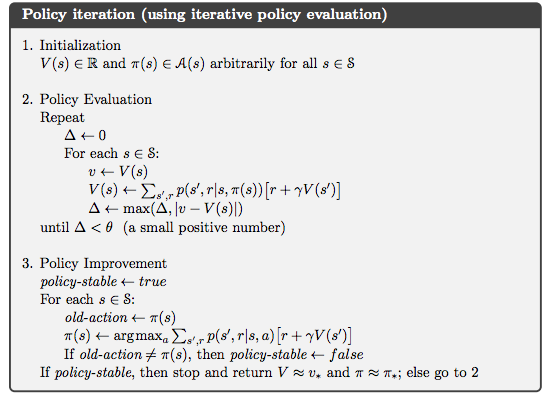

In [3]:
Image('5-6_01.png')

Any optimal policy can be subdivided into two components:

- An optimal first action A∗
- Followed by an optimal policy from successor state S'

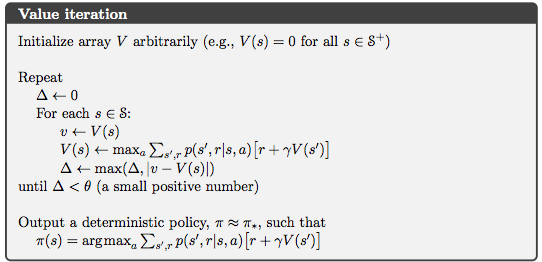

In [4]:
Image('5-6_02.png')

Value iteration effectively combines, in each of its sweeps, one sweep of policy evaluation and one sweep of policy improvement. Faster convergence is often achieved
by interposing multiple policy evaluation sweeps between each policy improvement sweep.

**Contraction Mapping Theorem** 

For any metric space V that is complete (i.e. closed) under an operator T(v), where T is a γ-contraction,

- T converges to a unique fixed point
- At a linear convergence rate of γ

Therefore, for an MDP with a finite state and action space

- The optimality equations have a unique solution.
-  The values produced by value iteration converge to the solution of the optimality equations.

Convergence of Iter. Policy Evaluation and Policy Iteration

- The Bellman expectation operator $T^π$ has a unique fixed point 
- $V^{\pi}$ is a fixed point of $T^{\pi}$ (by Bellman expectation equation)
- By contraction mapping theorem 
  - Iterative policy evaluation converges on $V^{\pi}$
  - Policy iteration converges on $V^*$
  
Convergence of Value Iteration

-  The Bellman optimality operator $T^*$ has a unique fixed point 
- $V^*$ is a fixed point of $T^*$ (by Bellman optimality equation)
- By contraction mapping theorem: value iteration converges on $V^*$

Value iteration techniques use the Bellman optimality equation to iteratively compute an optimal value function, from which an optimal policy is derived. The DP (model-based) algorithms for value iteration follow by RL (modelfree) algorithms. DP algorithms like V-iteration (Bertsekas, 2007, Section 1.3) solve the Bellman optimality equation by using knowledge of the transition and reward functions. RL techniques either learn a model, e.g., Dyna (Sutton, 1990), or do not use an explicit model at all, e.g., Q-learning (Watkins and Dayan, 1992).

Insight into DP methods and, in fact, into almost all reinforcement learning methods, can be gained by viewing them as generalized policy iteration (GPI). GPI is the general idea of two interacting processes revolving around an approximate policy and an approximate value function. One process takes the policy as given and performs
some form of policy evaluation, changing the value function to be more like the true value function for the policy. The other process takes the value function as given and performs some form of policy improvement, changing the policy to make it better, assuming that the value function is its value function. Although each process changes the basis for the other, overall they work together to find a joint solution: a policy and value function that are unchanged by either process and, consequently, are optimal.

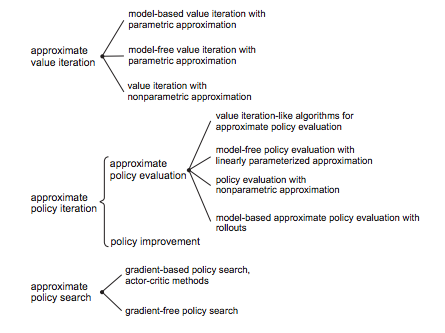

In [5]:
Image('5-6_03.png')

Dynamic programming offers a unified approach to solving problems of stochastic control. Central to the methodology is the optimal value function, which can be obtained via solving Bellman’s equation. The domain of the optimal value function is the state space of the system to be controlled, and dynamic programming algorithms compute and store a table consisting of the optimal value function evaluated at each state. Unfortunately, the size of a state space typically grows exponentially in the number of state variables. Known as the curse of dimensionality, this phenomenon renders dynamic programming intractable in the face of problems of practical scale.

Approximate dynamic programming aims to alleviate the curse of dimensionality by considering approximations to the optimal value function — scoring functions — that can be computed and stored efficiently. 

Alternative numerical methods for approximating solutions to continuous-state dynamic programming (DP) problems: *discrete approximation* and *parametric approximation*. In the former, the continuous state space is discretized into a finite number of points N, and the resulting finite-state DP problem is solved numerically. In the latter, a function associated with the DP problem such as the value function, the policy function, or some other related function is approximated by a smooth function of K unknown parameters. Values of the parameters are chosen so that the parametric function approximates the true function as closely as possible.

- For discrete approximation: the resulting algorithm as discrete policy iteration (DPI). Each policy evaluation step requires the solution of a system of linear equations with N variables. 
- For parametric approximation: the resulting algorithm as parametric policy iteration (PPI). Each policy evaluation step requires the solution of a linear regression with K unknown parameters. 

The advantage of PPI is that it is generally much faster than DPI, particularly when V can be well-approximated with small K. The disadvantage is that the PPI algorithm may either fail to converge or may converge to an incorrect solution. 

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 6. Messing with Rewards</span>

The idea of *reward shaping* is to provide an additional reward representative of prior knowledge to reduce the number
of suboptimal actions made and so reduce the time needed to learn.

Types:

- scale (positively)
- shift (add a constant)
- potential functions
  - multi-agent potential-based reward shaping
  - dynamic potential-based reward shaping

The shaping reward F does not come from the environment. It is extra information which is incorporated by the designer of the system and estimated on the basis of knowledge of the problem. This extra reward supplements the environment
reward R which is typically defined as a sparse function for practical reasons. The agent learns a task using the shaped reward R':

R'(s, a, s') = R(s, a, s') + F(s, a, s') 

**Asynchronous DP algorithms** are in-place iterative DP algorithms that are not organized in terms of systematic sweeps of the state set. These algorithms back up the values of states in any order whatsoever, using whatever values of other states happen to be available. The values of some states may be backed up several times before the values of others are backed up once. To converge correctly, however, an asynchronous algorithm must continue to backup the values of all the states: it can’t ignore any state after some point in the computation. Asynchronous DP algorithms allow great flexibility in selecting states to which backup operations are applied.

**Generalized policy iteration (GPI)** refers to the general idea of letting policy evaluation and policy improvement processes interact, independent of the granularity and other details of the two processes. It is easy to see that if both the evaluation process and the improvement process stabilize, that is, no longer produce changes, then the value function and policy must be optimal.

The evaluation and improvement processes in GPI can be viewed as both competing and cooperating.